In [1]:
import qiskit
import numpy as np, matplotlib.pyplot as plt

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
import keras
from keras.datasets import mnist
import classical_part
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_val, y_val = x_train[500:600,:], y_train[500:600]
x_train, y_train = x_train[:500,:], y_train[:500]

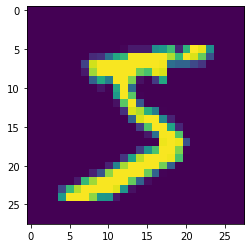

In [4]:
plt.imshow(x_train[0])

In [17]:
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
X_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

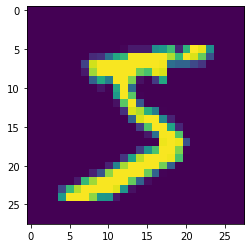

In [6]:
plt.imshow(x_train[0])

In [19]:
# # 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
# xq_train = []
# for x_train_item in x_train:
#     xq_train.append(classical_part.quantum_model(x_train_item))
# xq_test = []
# for x_test_item in x_train:
#     xq_test.append(classical_part.quantum_model(x_test_item))
xq_val = []
for x_val_item in x_train:
    xq_val.append(classical_part.quantum_model(x_val_item))

In [ ]:
print(xq_val.shape)

In [65]:
# 4. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  5
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [66]:
cmodel = classical_part.classical_model()
hmodel = classical_part.hybrid_model()

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
16/16 [==============================] - 3s 105ms/step - loss: 2.6257 - accuracy: 0.1420 - val_loss: 2.3573 - val_accuracy: 0.1300
Epoch 2/10
16/16 [==============================] - 1s 79ms/step - loss: 2.2810 - accuracy: 0.1700 - val_loss: 2.2279 - val_accuracy: 0.1700
Epoch 3/10
16/16 [==============================] - 1s 75ms/step - loss: 2.1283 - accuracy: 0.2800 - val_loss: 2.0131 - val_accuracy: 0.4400
Epoch 4/10
16/16 [==============================] - 1s 74ms/step - loss: 1.7169 - accuracy: 0.6000 - val_loss: 1.5681 - val_accuracy: 0.6200
Epoch 5/10
16/16 [==============================] - 1s 80ms/step - loss: 1.1999 - accuracy: 0.7640 - val_loss: 1.2028 - val_accuracy: 0.7500
Epoch 6/10
16/16 [==============================] - 1s 79ms/step - loss: 0.8627 - accuracy: 0.8380 - val_loss: 1.0308 - val_accuracy: 0.7200
Epoch 7/10
16/16 [==============================] - 1s 75ms/step - loss: 0.6633 - accuracy: 0.8620 - val_loss: 0.8737 - val_accuracy: 0.7600
Epoch 8/10
1

In [14]:
results = model.evaluate(X_test, Y_test, batch_size=128)
print("test loss, test acc:", results)

79/79 [==============================] - 6s 71ms/step - loss: 0.6002 - accuracy: 0.8334
test loss, test acc: [0.6002498269081116, 0.8334000110626221]


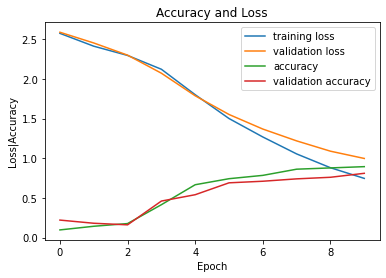

In [10]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()